In [ ]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)
image

In [3]:
import os
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image
import torch

# Disable CUDA explicitly
os.environ["CUDA_VISIBLE_DEVICES"] = ""

device = "cpu"

# Load the ControlNet model and move it to the CPU
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float32).to(device)

# Load the Stable Diffusion pipeline with ControlNet and move to the CPU
pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float32
).to(device)

# Remove or comment out offloading for testing on CPU
# pipeline.enable_sequential_cpu_offload()

# Load the conditioning image and ensure it's on the CPU
image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png").convert("RGB")

# Generate the image
prompt = "best quality, extremely detailed"
negative_prompt = "your negative prompt"
# negative_prompt = "no glasses, no hats, no background clutter"

output = pipeline(
    prompt, image, negative_prompt=negative_prompt
).images[0]

# Save the generated image
output.save("output.png")


100%|██████████| 50/50 [19:22<00:00, 23.26s/it]


In [8]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

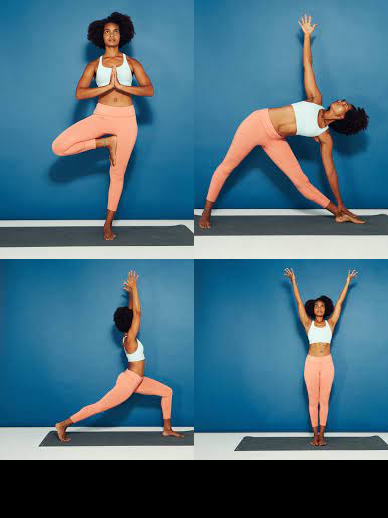

In [9]:
urls = "yoga1.jpeg", "yoga2.jpeg", "yoga3.jpeg", "yoga4.jpeg"
imgs = [
    load_image("https://hf.co/datasets/YiYiXu/controlnet-testing/resolve/main/" + url)
    for url in urls
]

image_grid(imgs, 2, 2)

/Users/macbook/Desktop/controlnet/.envcontrolnet/lib/python3.11/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


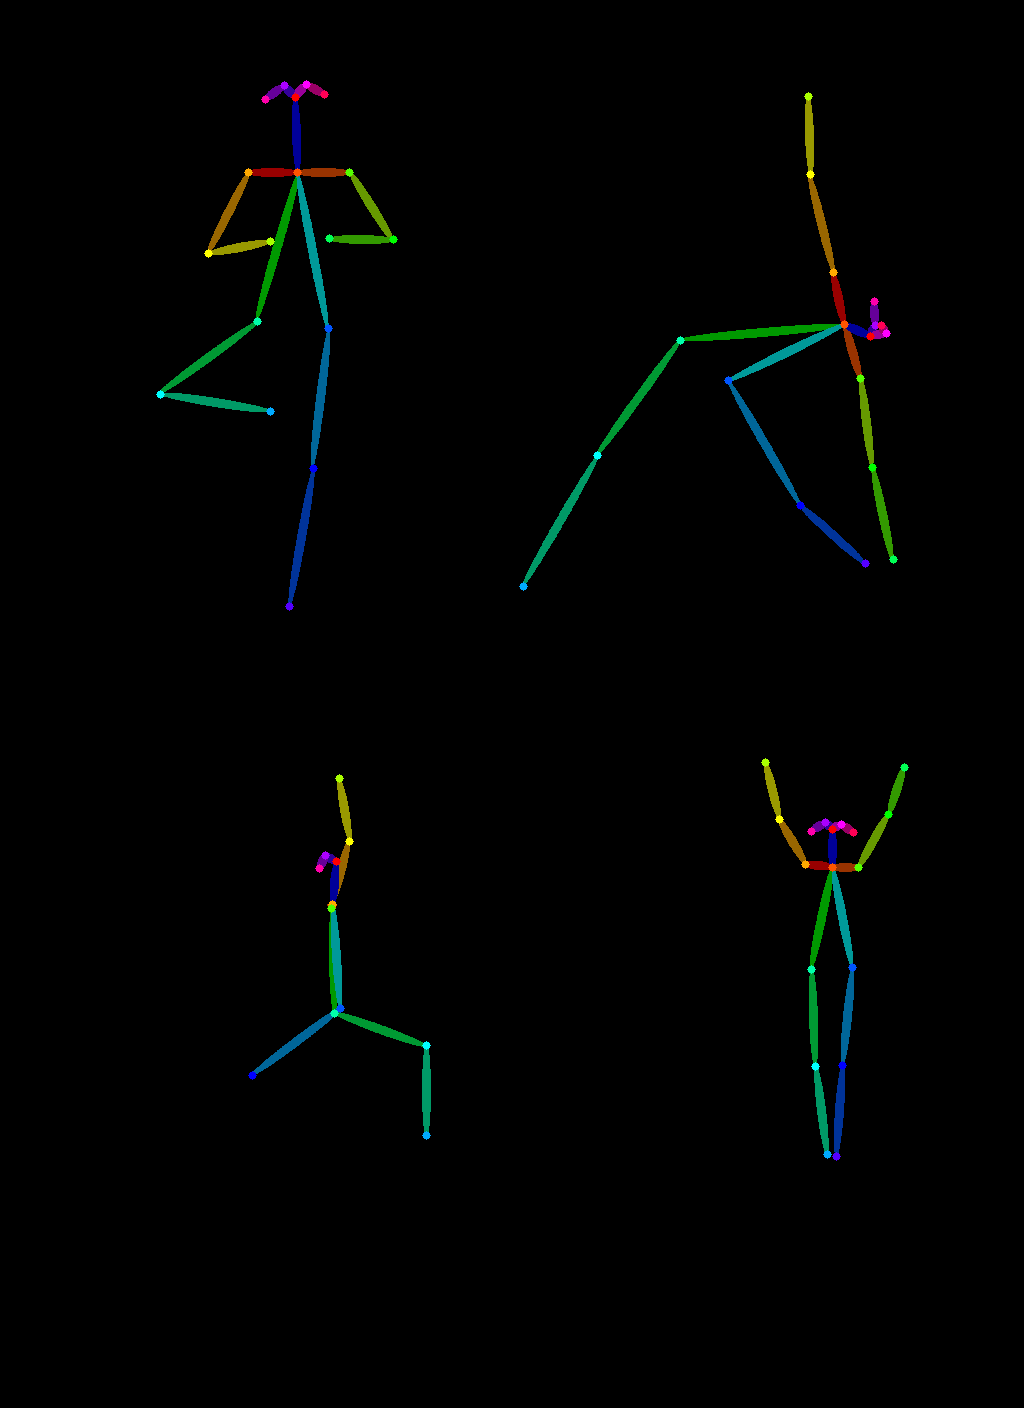

In [11]:
from controlnet_aux import OpenposeDetector

model = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

poses = [model(img) for img in imgs]
image_grid(poses, 2, 2)

In [12]:
import os
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

# Disable CUDA explicitly
os.environ["CUDA_VISIBLE_DEVICES"] = ""

device = "cpu"

# Load the ControlNet model and move it to the CPU
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float32).to(device)

# Load the Stable Diffusion pipeline with ControlNet and move to the CPU
pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float32
).to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]


In [ ]:
generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(4)]
prompt = "super-hero character, best quality, extremely detailed"
output = pipeline(
    [prompt] * 4,
    poses,
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"] * 4,
    generator=generator,
    num_inference_steps=20,
)
image_grid(output.images, 2, 2)

 90%|█████████ | 18/20 [25:36<02:34, 77.04s/it]